In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

x_train = pd.read_table('Data/20210524_A1101_xtrain.txt', sep=' ', header=None)
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9
0,14.0,10.0,5.0,9.0,13.0,10.0,17.0,9.0,9.0,4.0
1,3.0,18.0,0.0,3.0,16.0,18.0,11.0,5.0,11.0,4.0
2,17.0,10.0,8.0,10.0,16.0,12.0,9.0,10.0,10.0,20.0
3,8.0,8.0,12.0,2.0,9.0,6.0,9.0,14.0,20.0,4.0
4,17.0,10.0,16.0,15.0,18.0,19.0,6.0,12.0,9.0,4.0
5,5.0,8.0,20.0,5.0,6.0,9.0,9.0,14.0,20.0,4.0
6,8.0,5.0,15.0,3.0,8.0,0.0,16.0,16.0,11.0,9.0
7,20.0,0.0,2.0,16.0,18.0,9.0,6.0,15.0,4.0,4.0
8,17.0,16.0,17.0,10.0,14.0,3.0,14.0,8.0,0.0,19.0
9,17.0,16.0,17.0,10.0,14.0,3.0,14.0,8.0,6.0,19.0


In [3]:
input_dict = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'END': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'M': 11, 'N': 12,
 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}

placeholder_index = 4

In [4]:
y_train = pd.read_table('Data/20210524_A1101_ytrain.txt', sep=' ', header=None)
y_train.head(10)

,0
0,0.480269
1,0.084687
2,0.360284
3,0.165126
4,0.681016
5,0.084687
6,0.319863
7,-0.030790
8,-0.030790
9,-0.030790


In [5]:
x_train.shape, y_train.shape

((4522, 10), (4522, 1))

In [6]:
x_val = pd.read_table('Data/20210524_A1101_xval.txt', sep=' ', header=None)
y_val = pd.read_table('Data/20210524_A1101_yval.txt', sep=' ', header=None)

In [7]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

2024-07-18 14:50:09.180560: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-18 14:50:09.205065: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 14:50:09.211940: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 14:50:09.228993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 14:50:09.250066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [9]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Embedding(input_dim=21, output_dim=50),

    keras.layers.LSTM(128, return_sequences=True, input_shape=(10,21)),
    keras.layers.Dropout(0.5333),

    keras.layers.LSTM(128, return_sequences=False),
    keras.layers.Dropout(0.5631),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.LeakyReLU(alpha=0.3),

    keras.layers.Dropout(0.7995),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error', metrics=['mse'])

hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.0580 - val_mse: 0.0580
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0513 - mse: 0.0513 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0455 - mse: 0.0455 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0442 - mse: 0.0442 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0408 - mse: 0.0408 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0377 - mse: 0.0377 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/

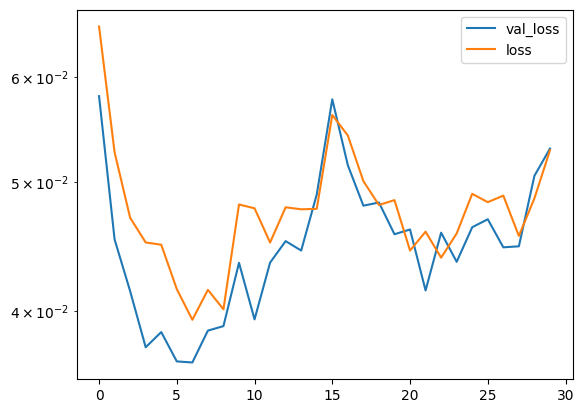

In [10]:
plt.semilogy(hist.history['val_loss'])
plt.semilogy(hist.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.show()

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 10, 50)         │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 697,811 (2.66 MB)

 Trainable params: 232,603 (908.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 465,208 (1.77 MB)

In [29]:
x_test = pd.read_table('Data/20210524_A1101_xtest.txt', sep=' ', header=None)
y_test = pd.read_table('Data/20210524_A1101_ytest.txt', sep=' ', header=None)

In [33]:
model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mse: 0.0447


[0.047389186918735504, 0.047389186918735504]

In [34]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [38]:
y_test

,0
0,0.084687
1,0.084687
2,0.364742
3,0.666851
4,0.798403
...,...
624,0.084687
625,0.084687
626,0.871874
627,0.687168


In [45]:
print(spearmanr(y_pred.iloc[:, 0], y_test.iloc[:, 0]))
mseCCS=round(mean_squared_error(y_pred.iloc[:, 0], y_test.iloc[:, 0]),4)

SignificanceResult(statistic=0.7036506644649995, pvalue=4.012518487793485e-95)


In [46]:
mseCCS

0.0474

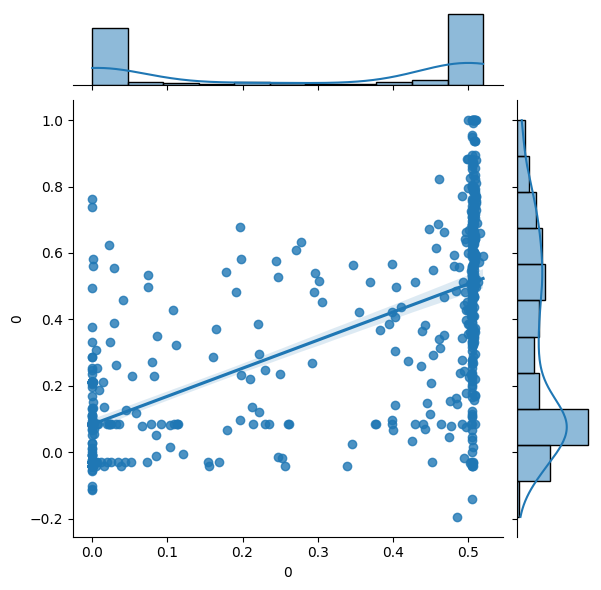

In [43]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error

jp = sns.jointplot(x=y_pred.iloc[:, 0], y=y_test.iloc[:, 0], kind='reg')

plt.show()